#Supervised Learning Algorithms - Simple Linear Regression (Univariant): 
Consider any dataset from UCI repository. Create Simple Linear Regression models using the training data set. Predict the scores on the test data and find the error in prediction (E.g. RMSE, MAE, LSE).  Include appropriate code snippets to visualize the model. Use Sub-Plots Interpret the result. Write the Inference. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

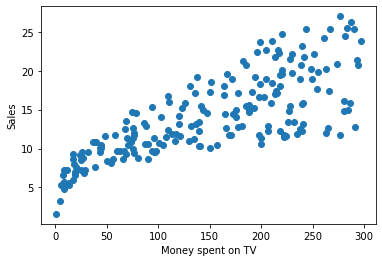

In [4]:
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('Money spent on TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

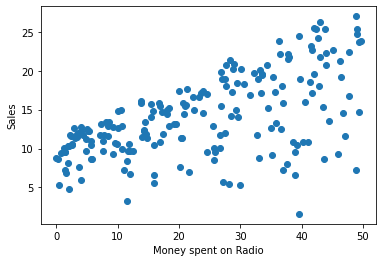

In [5]:
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel('Money spent on Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

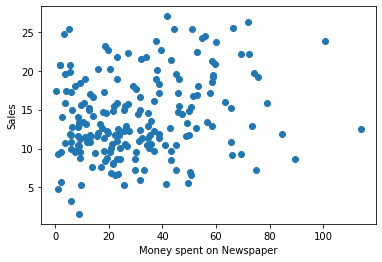

In [6]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Money spent on Newspaper')
plt.ylabel('Sales')

In [7]:
# Defining a function to do the work 
def linReg(x,y):
    print((x+" vs " + y).center(40,'='))
    # train_test_split with 70-30 ratio
    x_train,x_test,y_train,y_test=train_test_split(df[x],df[y],test_size=0.3)
    
    x_train = x_train.to_numpy().reshape(-1,1)
    x_test = x_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    #Initializing and fitting LinearRegression model
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    #Printing Coeff and Intercept values
    print("Coeff=",lr.coef_[0][0],"\nIntercept=",lr.intercept_[0])
    pred = lr.predict(x_test)
    #Prining line of regression
    print("The linear model of {} versus {} is: Y = {:.3} + {:.2}X".format(x,y,lr.intercept_[0], lr.coef_[0][0]))
    #Finding Root Mean Sqaured Error
    rmse=np.sqrt(m.mean_squared_error(y_test,pred))
    #Finiding Mean Absolute Error
    mae = m.mean_absolute_error(y_test,pred)
    #Finding Mean Squared Error
    mse = m.mean_squared_error(y_test,pred)
    #Printing all error matrics
    print("Root Mean Square Srror= {}\nMean Absolute Error = {}\nMean Squared Error = {}".format(rmse,mae,mse))
    #Plotting the final Graph
    plt.scatter(x_train,y_train)
    plt.scatter(x_test,y_test)
    plt.xlabel("Money Spent on "+x)
    plt.ylabel(y)
    plt.title(x+" vs "+y)
    plt.plot(x_test,pred,c='gold')
    

==============TV vs Sales===============
Coeff= 0.049749542576351516 
Intercept= 6.911009440030179
The linear model of TV versus Sales is: Y = 6.91 + 0.05X
Root Mean Square Srror= 3.0012583329098175
Mean Absolute Error = 2.261936780451424
Mean Squared Error = 9.007551580860618
=============Radio vs Sales=============
Coeff= 0.1994888789524021 
Intercept= 9.280683388639172
The linear model of Radio versus Sales is: Y = 9.28 + 0.2X
Root Mean Square Srror= 4.219673708137163
Mean Absolute Error = 3.2239131704570148
Mean Squared Error = 17.80564620314404
===========Newspaper vs Sales===========
Coeff= 0.047854688866659986 
Intercept= 12.609156654647823
The linear model of Newspaper versus Sales is: Y = 12.6 + 0.048X
Root Mean Square Srror= 5.132694232201806
Mean Absolute Error = 3.971110598818664
Mean Squared Error = 26.344550081277685


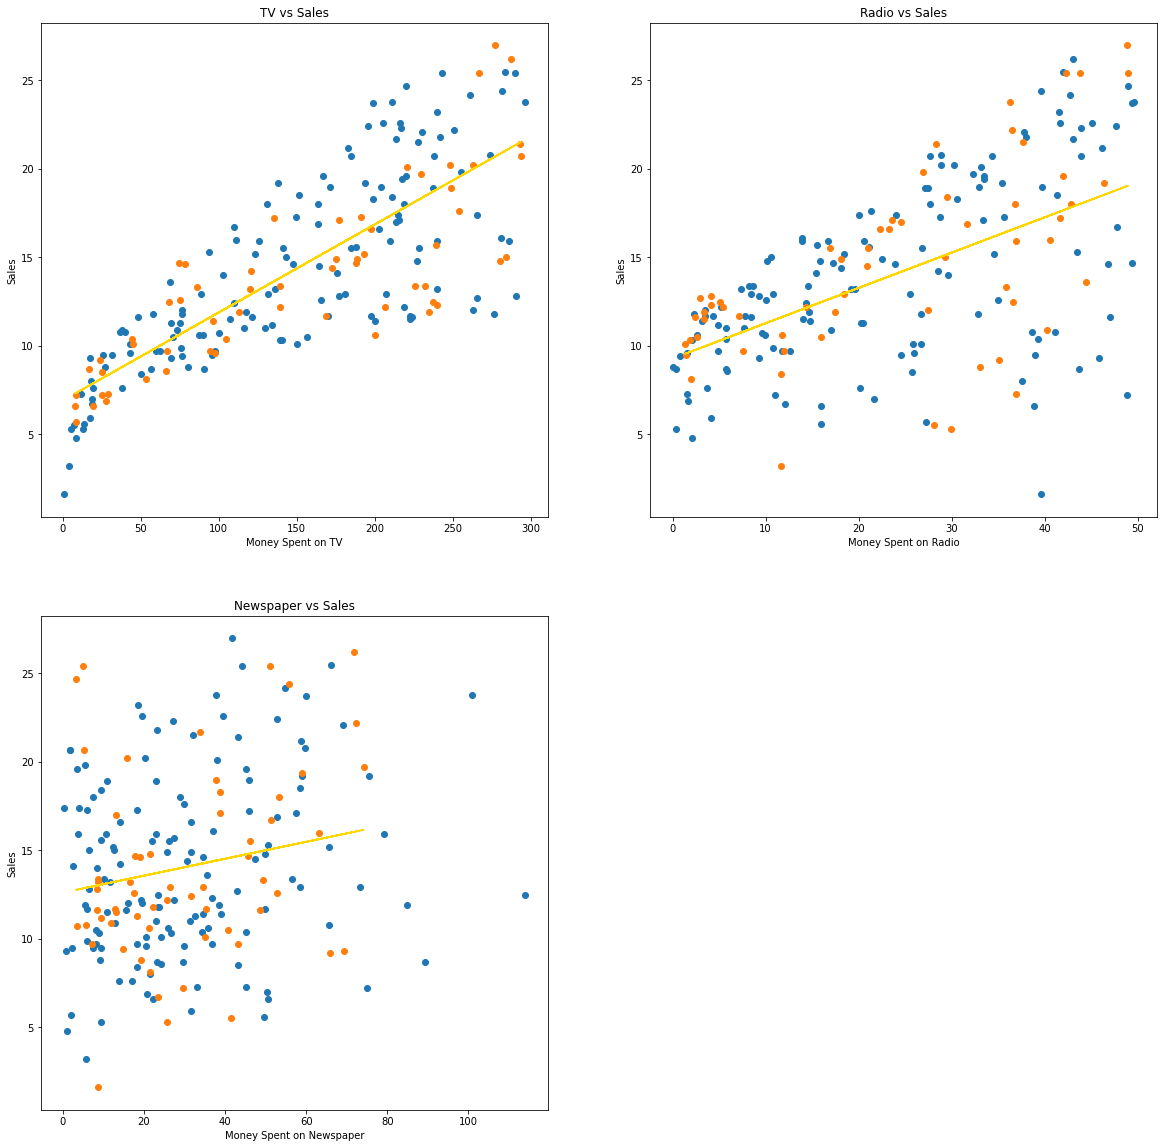

In [8]:
#Creating a shhet where we`ll print all graphs 
#Calling the function with column names only
sheet = plt.figure(figsize=(20,20))
sheet.add_subplot(2,2,1)
linReg('TV','Sales')
sheet.add_subplot(2,2,2)
linReg('Radio','Sales')
sheet.add_subplot(2,2,3)
linReg('Newspaper','Sales')
